## Top-down Approach Based on the book The Vital Few vs The Trivial Many

In [2]:
#Import lots of stuff
import heapq
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import pandas_datareader.data as web
from datetime import datetime

#### Marco Market Trends: when to enter the market based on overall market

In [3]:
# get Stock data
ticker = 'MSFT'
startDate = datetime(2017, 6, 19)
endDate = datetime(2018, 6, 1)

# Import stock data
df = pdr.get_data_quandl(ticker, start=startDate, end=endDate)
df = df.reindex(index=df.index[::-1])

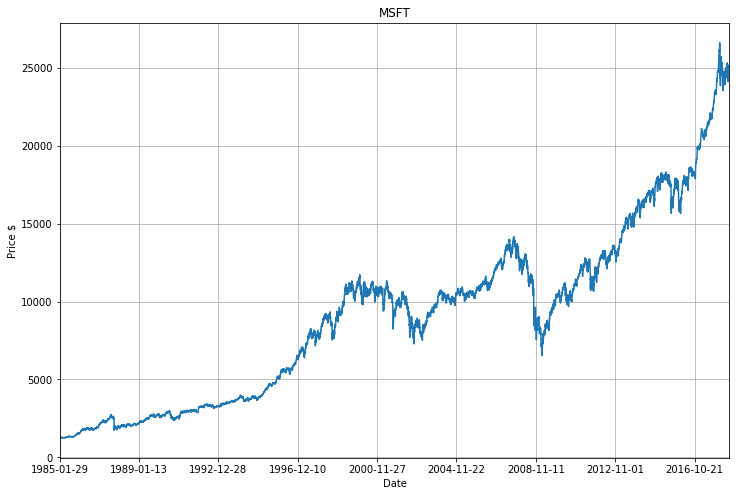

In [4]:
#import daily data from file
df = pd.read_csv("^DJIdaily.csv") #downloaded from yahoo finance
df = df.set_index(df.Date) #index by date
df.head()

# Plot the closing prices
df['Adj Close'].plot(grid=True,figsize=(12,8))
plt.title(ticker)
plt.ylabel('Price $')

# Show all of the data
plt.show()

#other plotting style
#p = figure(title=ticker,x_axis_type='datetime',y_axis_label='Price $')
#p.line(df.index.values,df['Close'])
#show(p)

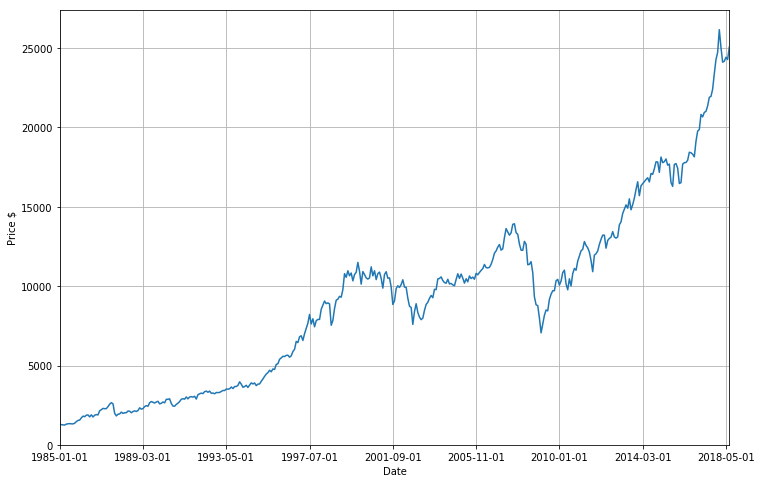

In [34]:
#import monthly data from file
dfm = pd.read_csv("^DJImonthly.csv")
dfm = dfm.set_index(dfm.Date) #index by date
dfm.head()

# Plot the closing prices
dfm['Adj Close'].plot(grid=True,figsize=(12,8))
plt.title(ticker)
plt.ylabel('Price $')

# Show all of the data
plt.show()

#other plotting style
#p = figure(title=ticker,x_axis_type='datetime',y_axis_label='Price $')
#p.line(df.index.values,df['Close'])
#show(p)

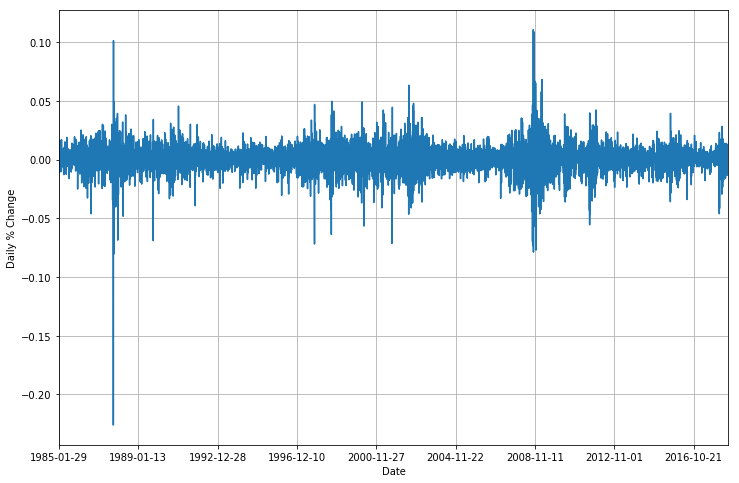

In [38]:
# check for trends in the market to investigate best times to enter market

#calculate daily precent changes and monthly precent changes
df['daily_percent_change'] = df['Adj Close']/df['Adj Close'].shift(1) - 1.0
df.head(6)

# Plot the closing prices
df['daily_percent_change'].plot(grid=True,figsize=(12,8))
plt.title(ticker)
plt.ylabel('Daily % Change')

# Show all of the data
plt.show()

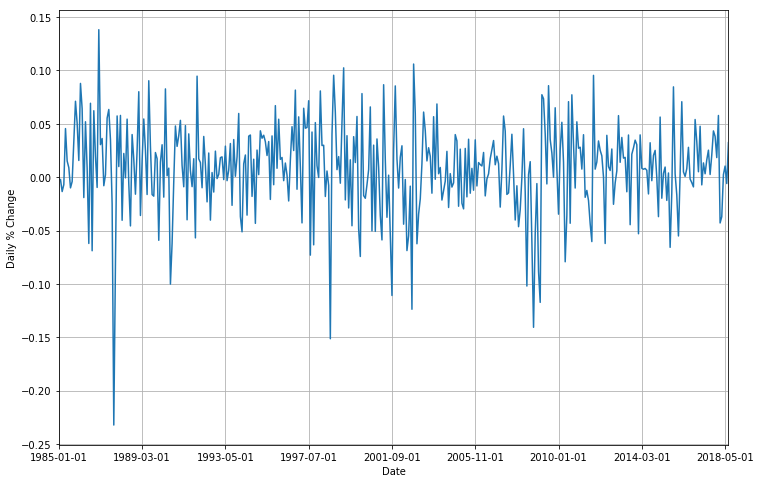

In [39]:
dfm['monthly_percent_change'] = dfm['Adj Close']/dfm['Adj Close'].shift(1) - 1.0
dfm.head(6)

# Plot the closing prices
dfm['monthly_percent_change'].plot(grid=True,figsize=(12,8))
plt.title(ticker)
plt.ylabel('Daily % Change')

# Show all of the data
plt.show()

In [40]:
df['daily_percent_change'].describe()

/Users/Razander/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


count    8438.000000
mean        0.000412
std         0.010931
min        -0.226102
25%              NaN
50%              NaN
75%              NaN
max         0.110803
Name: daily_percent_change, dtype: float64

In [42]:
dfm['monthly_percent_change'].describe()

/Users/Razander/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


count    402.000000
mean       0.008326
std        0.042355
min       -0.232159
25%             NaN
50%             NaN
75%             NaN
max        0.138237
Name: monthly_percent_change, dtype: float64

In [140]:
dfm=dfm[4::]
dfm.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,monthly_percent_change
Date,,,,,,,,
1985-05-01,1985-05-01,1257.180054,1320.790039,1235.530029,1315.410034,1315.410034,242250000,0.045586
1985-06-01,1985-06-01,1321.239990,1341.170044,1285.390015,1335.459961,1335.459961,205340000,0.015242
1985-07-01,1985-07-01,1334.010010,1372.199951,1313.400024,1347.449951,1347.449951,235130000,0.008978
1985-08-01,1985-08-01,1350.020020,1361.900024,1303.650024,1334.010010,1334.010010,176010000,-0.009974
1985-09-01,1985-09-01,1333.670044,1348.229980,1283.709961,1328.630005,1328.630005,196960000,-0.004033
1985-10-01,1985-10-01,1329.640015,1384.630005,1315.189941,1374.310059,1374.310059,253060000,0.034381
1985-11-01,1985-11-01,1372.130005,1486.930054,1367.780029,1472.130005,1472.130005,303580000,0.071177
1985-12-01,1985-12-01,1471.329956,1570.869995,1450.339966,1546.670044,1546.670044,361820000,0.050634
1986-01-01,1986-01-01,1546.219971,1582.910034,1491.739990,1570.989990,1570.989990,311020000,0.015724


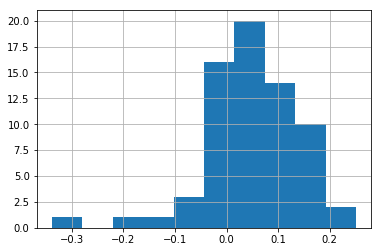

In [141]:
dfm.index = pd.to_datetime(dfm.index)
dfm['monthly_percent_change'].resample('6M').sum().hist()


In [142]:
dfm['monthly_percent_change'].resample('6M').sum()
data1 = dfm['monthly_percent_change'].resample('6M').sum()[::2]
data2 = dfm['monthly_percent_change'].resample('6M').sum()[1::2]
print(data1)

Date
1985-05-31    0.045586
1986-05-31    0.251282
1987-05-31    0.189859
1988-05-31    0.106666
1989-05-31    0.165397
1990-05-31    0.067001
1991-05-31    0.171622
1992-05-31    0.165273
1993-05-31    0.065842
1994-05-31    0.024236
1995-05-31    0.180611
1996-05-31    0.108084
1997-05-31    0.122597
1998-05-31    0.133163
1999-05-31    0.153613
2000-05-31   -0.024287
2001-05-31    0.053477
2002-05-31    0.009250
2003-05-31    0.000477
2004-05-31    0.043284
2005-05-31    0.006168
2006-05-31    0.033663
2007-05-31    0.112056
2008-05-31   -0.053695
2009-05-31   -0.020090
2010-05-31   -0.014674
2011-05-31    0.135888
2012-05-31    0.031651
2013-05-31    0.151538
2014-05-31    0.041233
2015-05-31    0.012660
2016-05-31    0.007909
2017-05-31    0.095796
2018-05-31    0.009377
Freq: 12M, Name: monthly_percent_change, dtype: float64


In [143]:
data2

Date
1985-11-30    0.115772
1986-11-30    0.028673
1987-11-30   -0.183224
1988-11-30    0.043806
1989-11-30    0.092203
1990-11-30   -0.108223
1991-11-30   -0.041356
1992-11-30   -0.025611
1993-11-30    0.044893
1994-11-30   -0.001710
1995-11-30    0.131806
1996-11-30    0.149621
1997-11-30    0.075510
1998-11-30    0.043720
1999-11-30    0.032834
2000-11-30   -0.005088
2001-11-30   -0.089546
2002-11-30   -0.090102
2003-11-30    0.102491
2004-11-30    0.024780
2005-11-30    0.033429
2006-11-30    0.091292
2007-11-30   -0.017041
2008-11-30   -0.338734
2009-11-30    0.202781
2010-11-30    0.089640
2011-11-30   -0.035084
2012-11-30    0.051253
2013-11-30    0.065317
2014-11-30    0.065525
2015-11-30   -0.010263
2016-11-30    0.074327
2017-11-30    0.146697
2018-11-30    0.026498
Freq: 12M, Name: monthly_percent_change, dtype: float64

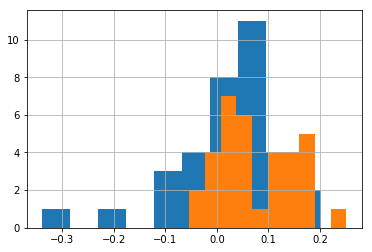

In [151]:
data2.hist()
data1.hist()

In [145]:
data1.describe()

count    34.000000
mean      0.075956
std       0.075266
min      -0.053695
25%       0.010198
50%       0.059659
75%       0.135207
max       0.251282
Name: monthly_percent_change, dtype: float64

In [146]:
data2.describe()

count    34.000000
mean      0.023144
std       0.102357
min      -0.338734
25%      -0.015346
50%       0.038575
75%       0.086108
max       0.202781
Name: monthly_percent_change, dtype: float64

In [132]:
# see if distributions are truly different
stats.ttest_ind(data2.dropna(),data1.dropna())

Ttest_indResult(statistic=1.0194820882747477, pvalue=0.3117537665664248)